#### Vaibhav Kumar
#### rollno 19 

####  Computer hardware dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error




In [2]:
data=pd.read_csv('D:\\vk\\TRIM 3\\ML\\DATASET\\machine.data',sep=',')

In [3]:
data

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   adviser  208 non-null    object
 1   32/60    208 non-null    object
 2   125      208 non-null    int64 
 3   256      208 non-null    int64 
 4   6000     208 non-null    int64 
 5   256.1    208 non-null    int64 
 6   16       208 non-null    int64 
 7   128      208 non-null    int64 
 8   198      208 non-null    int64 
 9   199      208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [5]:
data.describe()

,125,256,6000,256.1,16,128,198,199
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [6]:
data.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


<AxesSubplot:>

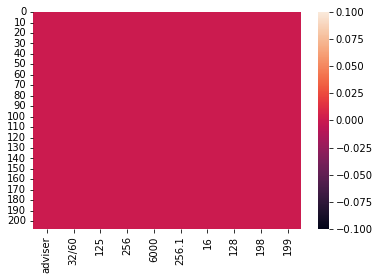

In [7]:
sns.heatmap(data.isna())

**no null values**

In [8]:
data.shape

(208, 10)

In [9]:
col_names=['vendorname','modelname','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

In [10]:
data.columns=col_names

In [11]:
data

,vendorname,modelname,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [12]:
data['ERP'].unique()

array([ 253,  132,  290,  381,  749, 1238,   23,   24,   70,  117,   15,
         64,   29,   22,  124,   35,   39,   40,   45,   28,   21,   27,
        102,   74,  138,  136,   44,   30,   41,   54,   18,   36,   38,
         34,   19,   72,   56,   42,   75,  113,  157,   20,   33,   47,
         25,   52,   50,   53,   73,   32,  175,   57,  181,   82,  171,
        361,  350,  220,   17,   26,   31,   76,   59,   65,  101,  116,
        128,   37,   46,   80,   88,   86,   95,  107,  119,  120,   48,
        126,  266,  270,  426,  151,  267,  603,   62,   78,  142,  281,
        190,   67,   43,   99,   81,  149,  183,  275,  382,  182,  227,
        341,  360,  919,  978], dtype=int64)

In [13]:
cor=data.corr()

<AxesSubplot:>

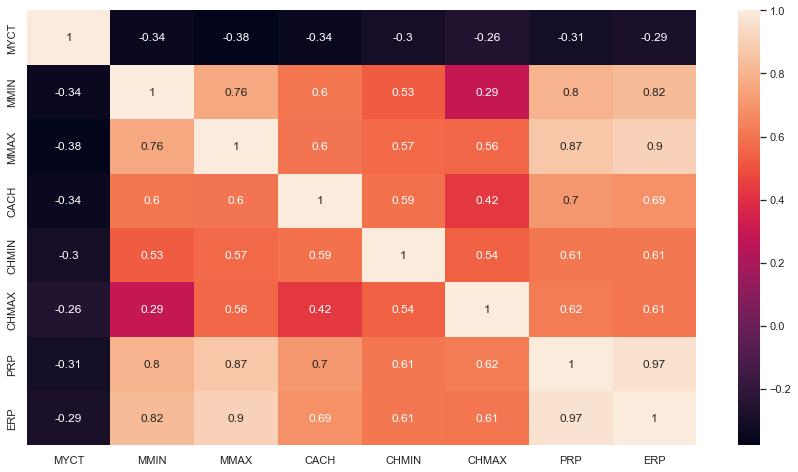

In [37]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(cor,annot=True)

 **all features are highly corelated with ERP,whereas MYCT machine cycle time in nanoseconds is negativly corelated**

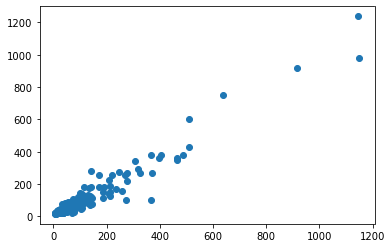

In [15]:
plt.scatter(data.PRP,data.ERP)

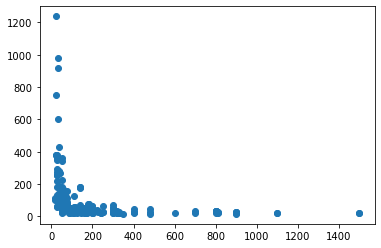

In [16]:
plt.scatter(data.MYCT,data.ERP)

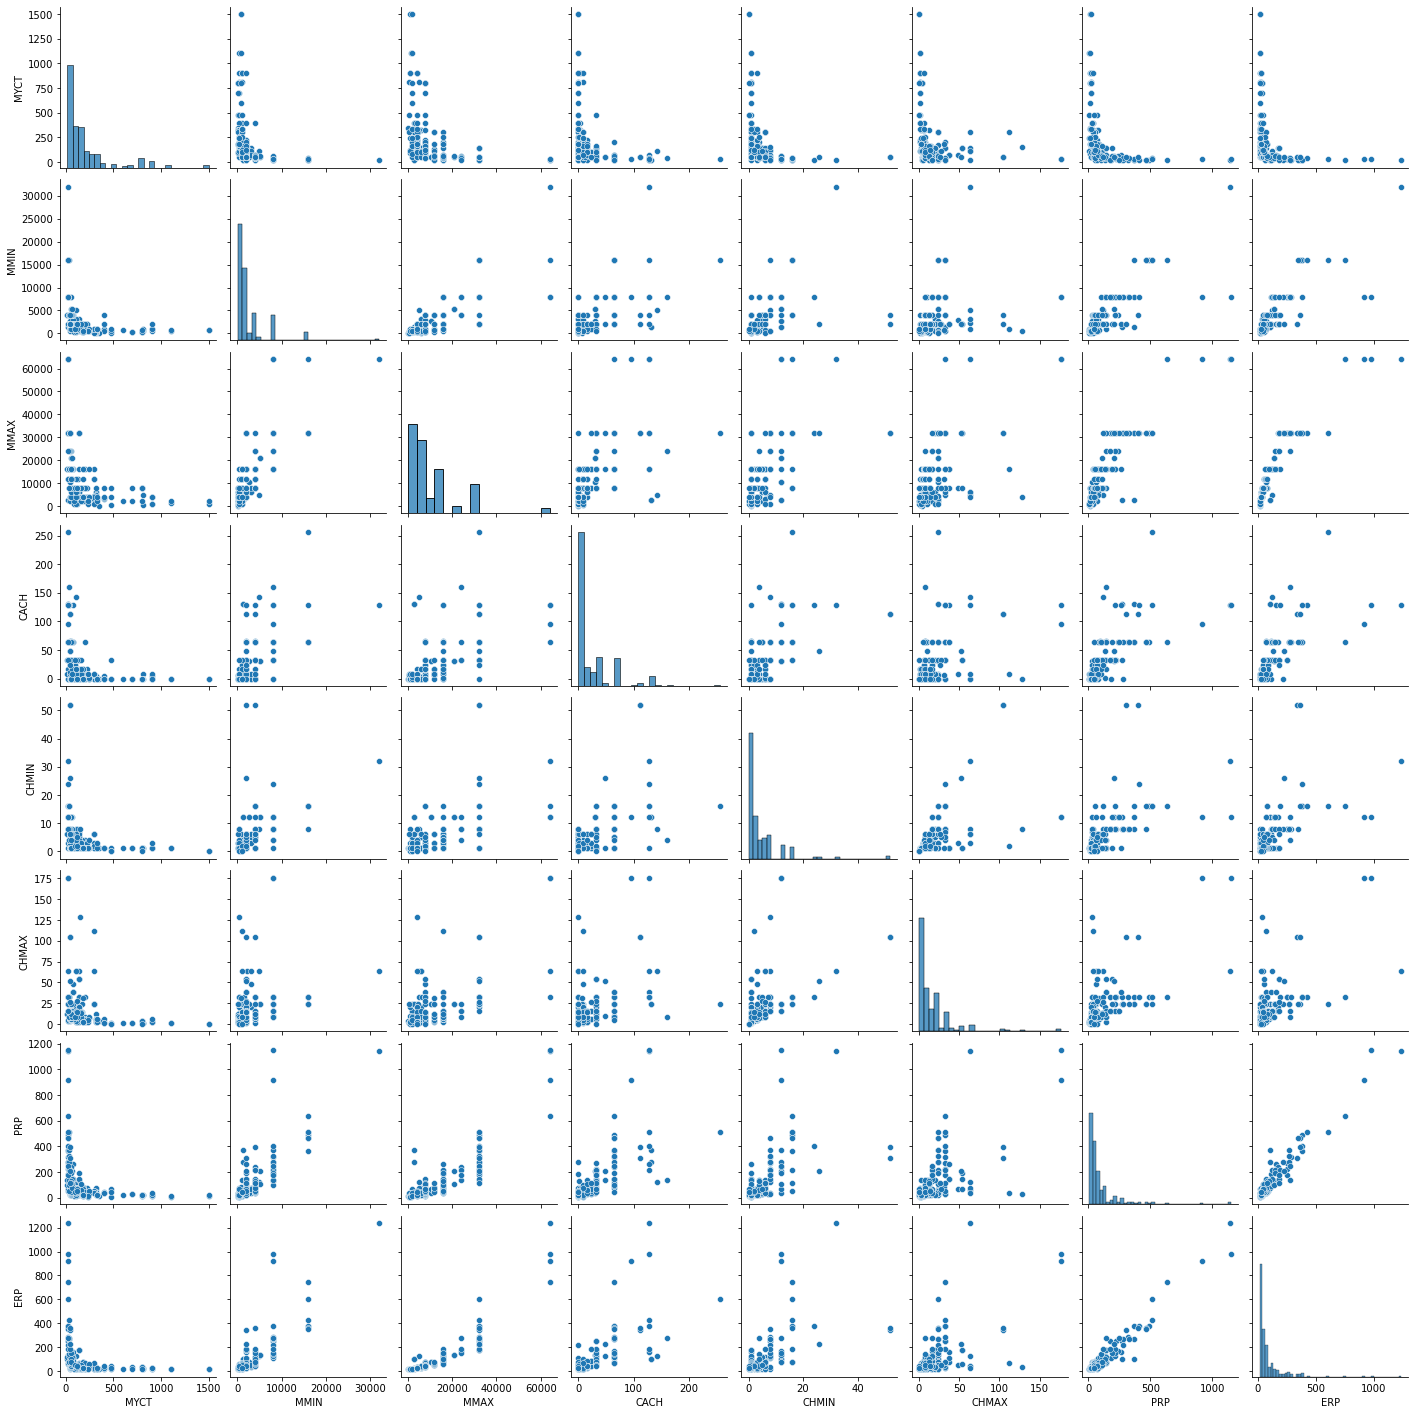

In [17]:
sns.pairplot(data)

In [18]:
data.vendorname.unique()

array(['amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d', 'cdc',
       'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould', 'hp',
       'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [19]:
data.modelname.unique()

array(['470v/7', '470v/7a', '470v/7b', '470v/7c', '470v/b', '580-5840',
       '580-5850', '580-5860', '580-5880', 'dn320', 'dn420', '7/65',
       '7/68', '5000', '8000', 'b1955', 'b2900', 'b2925', 'b4955',
       'b5900', 'b5920', 'b6900', 'b6925', '68/10-80', 'universe:2203t',
       'universe:68', 'universe:68/05', 'universe:68/137',
       'universe:68/37', 'cyber:170/750', 'cyber:170/760',
       'cyber:170/815', 'cyber:170/825', 'cyber:170/835', 'cyber:170/845',
       'omega:480-i', 'omega:480-ii', 'omega:480-iii', '1636-1',
       '1636-10', '1641-1', '1641-11', '1651-1', 'decsys:10:1091',
       'decsys:20:2060', 'microvax-1', 'vax:11/730', 'vax:11/750',
       'vax:11/780', 'eclipse:c/350', 'eclipse:m/600', 'eclipse:mv/10000',
       'eclipse:mv/4000', 'eclipse:mv/6000', 'eclipse:mv/8000',
       'eclipse:mv/8000-ii', 'f4000/100', 'f4000/200', 'f4000/200ap',
       'f4000/300', 'f4000/300ap', '2000/260', 'concept:32/8705',
       'concept:32/8750', 'concept:32/8780', '3000/3

In [20]:
y=data.pop('ERP')

In [21]:
x=data.drop(['vendorname','modelname'],axis=1)

In [22]:
x.shape

(208, 7)

In [23]:
y.shape

(208,)

In [24]:
x

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,29,8000,32000,32,8,32,269
1,29,8000,32000,32,8,32,220
2,29,8000,32000,32,8,32,172
3,29,8000,16000,32,8,16,132
4,26,8000,32000,64,8,32,318
...,...,...,...,...,...,...,...
203,124,1000,8000,0,1,8,42
204,98,1000,8000,32,2,8,46
205,125,2000,8000,0,2,14,52
206,480,512,8000,32,0,0,67


In [25]:

y

0      253
1      253
2      253
3      132
4      290
      ... 
203     37
204     50
205     41
206     47
207     25
Name: ERP, Length: 208, dtype: int64

**perform scalling on x**

In [26]:
data[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']]=StandardScaler().fit_transform(data[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP']])

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [28]:
reg=SVR(kernel='rbf')
reg.fit(xtrain,ytrain)

SVR()

In [29]:
pred=reg.predict(xtest)
mean_squared_error(pred,ytest)



52581.63770438957

In [30]:
pred

array([42.46287195, 76.34858199, 31.44508081, 32.33623693, 45.1471775 ,
       27.66039618, 42.45517321, 56.73797856, 96.01668616, 31.4316104 ,
       27.50948139, 30.54559369, 41.42460478, 30.2408295 , 76.35024458,
       31.40444177, 60.51628985, 73.90030619, 27.29879927, 42.46952107,
       42.45665773, 34.85784104, 42.46726195, 32.31687593, 30.57047553,
       57.91590675, 42.44821687, 28.62863608, 26.48284039, 28.71472567,
       70.43650323, 68.8001756 , 30.53492263, 73.899844  , 31.43665302,
       40.75004427, 60.51950061, 73.8876442 , 26.67242339, 42.46839197,
       41.41610857, 52.52797342])

In [31]:
xtrain.shape

(166, 7)

In [32]:
ytrain.shape

(166,)

In [34]:
svclassifier=SVR(kernel='linear')
svclassifier.fit(xtrain,ytrain)

SVR(kernel='linear')

In [35]:
pred=svclassifier.predict(xtest)

In [36]:
pred

array([ 56.58539712,  79.12163769,  31.07734524,  29.25343394,
       103.10757314,  16.36098724,  70.61143624,  46.07327592,
       107.88796508,  35.22208642,  15.39071726,  20.16488611,
        42.19337355,  86.98142814,  98.00846087,  32.7938671 ,
        80.48070895,  57.443035  ,   8.76931786,  76.51198851,
        87.66016232,  25.86217987,  58.03392731,  26.90167355,
        21.89404344,  48.89939844,  66.08888518, 143.3386653 ,
        13.18263627,  28.00379931, 553.51555335, 783.03171431,
        19.96671235,  62.39014994,  43.66914713,  18.79148471,
        99.38499009,  63.56395137,  10.85526346,  43.27447545,
        43.04953515,  69.14209544])